In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
import os

In [2]:
initial_data = yf.download("BCH-GBP", start="2020-12-03", end="2022-12-03")

[*********************100%***********************]  1 of 1 completed


In [3]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-03,220.123672,221.994278,213.365280,217.287689,217.287689,1436557192
2020-12-04,217.286774,227.844894,207.263931,208.867844,208.867844,2088017550
2020-12-05,208.838135,215.267288,205.217712,215.267288,215.267288,1325649141
2020-12-06,215.274261,217.657730,208.253067,213.463577,213.463577,1239330020
2020-12-07,213.451233,216.206741,210.375717,212.570984,212.570984,1176484251


In [4]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 730 entries, 2020-12-03 to 2022-12-02
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
730 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [5]:
data.head()

Date
2020-12-03    217.287689
2020-12-04    208.867844
2020-12-05    215.267288
2020-12-06    213.463577
2020-12-07    212.570984
Name: Adj Close, dtype: float64

In [6]:
data.describe().round(2)

count     730.00
mean      303.44
std       172.89
min        78.60
25%       145.35
50%       295.70
75%       419.83
max      1091.16
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

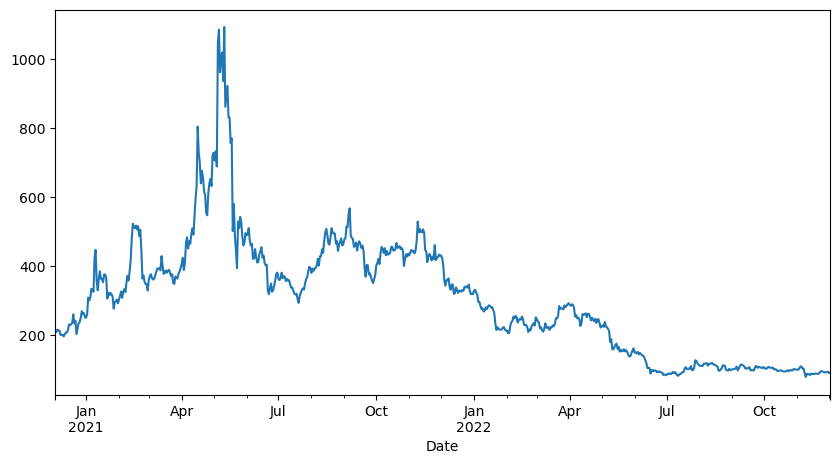

In [7]:
data.plot(figsize=(10, 5), subplots=True)

In [8]:
print("Movement Analysis")

Movement Analysis


In [9]:
BCH_data = pd.DataFrame(data).dropna()
BCH_data.tail()

,Adj Close
Date,
2022-11-28,92.041283
2022-11-29,93.007545
2022-11-30,93.903625
2022-12-01,89.983704
2022-12-02,91.046272


In [10]:
window = 10
BCH_data['min'] = data.rolling(window=window).min()
BCH_data['mean'] = data.rolling(window=window).mean()
BCH_data['std'] = data.rolling(window=window).std()
BCH_data['median'] = data.rolling(window=window).median()
BCH_data['max'] = data.rolling(window=window).max()
BCH_data['ewma'] = data.ewm(halflife=0.5, min_periods=window).mean()
BCH_data.dropna().head()

,Adj Close,min,mean,std,median,max,ewma
Date,,,,,,,
2020-12-12,202.423004,196.061783,206.711639,7.615341,205.645424,217.287689,201.101535
2020-12-13,206.766891,196.061783,205.659560,6.658514,204.594948,215.267288,205.350553
2020-12-14,207.534576,196.061783,205.526233,6.600229,204.594948,215.267288,206.988571
2020-12-15,214.467361,196.061783,205.446240,6.472667,204.594948,214.467361,212.597664
2020-12-16,230.648758,196.061783,207.164758,10.101787,204.594948,230.648758,226.135984


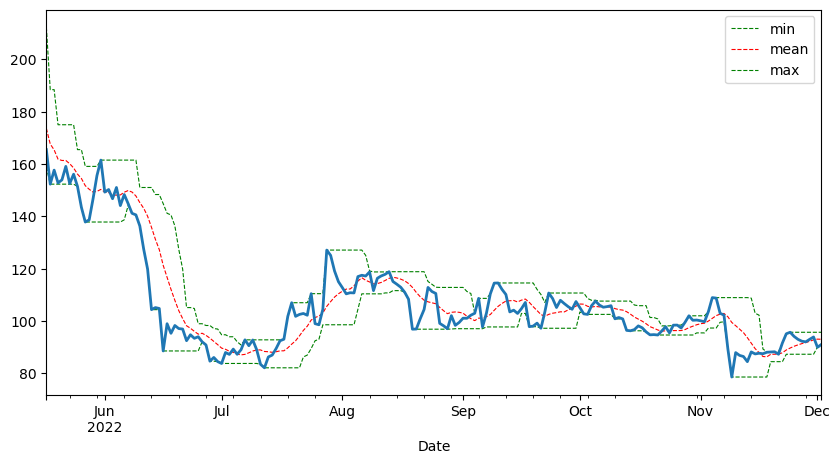

In [11]:
ax = BCH_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 5), style=['g--', 'r--', 'g--'], lw=0.8)
data.iloc[-200:].plot(ax=ax, lw=2.0);

In [12]:
BCH_data['SMA1'] = data.rolling(window=20).mean()
BCH_data['SMA2'] = data.rolling(window=60).mean()
BCH_data[['Adj Close', 'SMA1', 'SMA2']].tail()

,Adj Close,SMA1,SMA2
Date,,,
2022-11-28,92.041283,89.039391,96.739949
2022-11-29,93.007545,89.759898,96.499363
2022-11-30,93.903625,90.058652,96.312806
2022-12-01,89.983704,90.214610,96.100251
2022-12-02,91.046272,90.445138,95.908743


<AxesSubplot:xlabel='Date'>

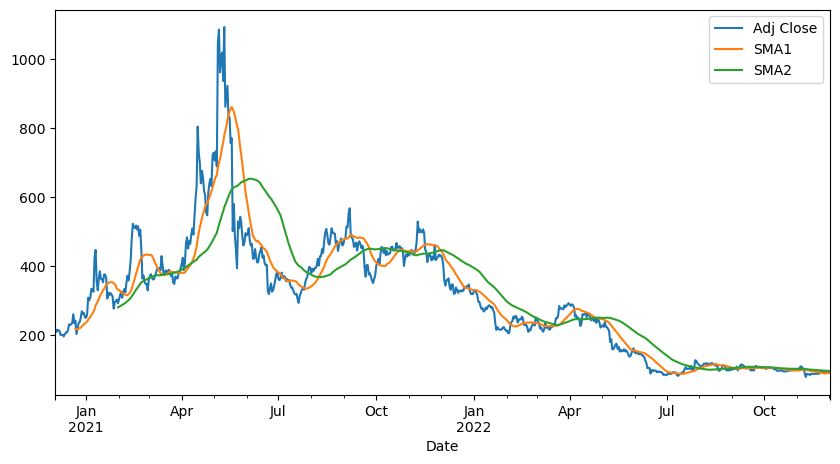

In [13]:
BCH_data[['Adj Close', 'SMA1', 'SMA2']].plot(figsize=(10, 5))

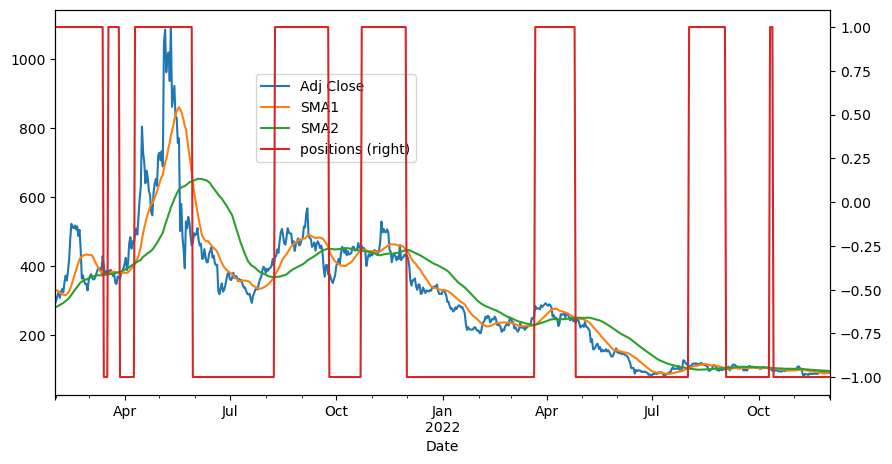

In [14]:
BCH_data.dropna(inplace=True)
BCH_data['positions'] = np.where(BCH_data['SMA1'] > BCH_data['SMA2'],1,-1)
ax = BCH_data[['Adj Close', 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 5),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

In [15]:
print("Return Volatility")

Return Volatility


In [16]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]
    adjclose_today = data.iloc[i+1]
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.0387497589564616,
 0.030638725755592542,
 -0.008378936495716506,
 -0.004181478616644468,
 -0.05827076088726106]

In [17]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]
    adjclose_today = data.iloc[i+1]
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.039520507401806675,
 0.030178732138100274,
 -0.008414237110157855,
 -0.004190245445762402,
 -0.060037477662018834]

In [18]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annualized normal return is %.8f and its annualized volatility is %.8f' % (nr,nv))

The annualized normal return is 0.34782078 and its annualized volatility is 1.57562388


In [19]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return is %.8f and its annualized volatility is %.8f' % (lr,lv))

The annualized log return is -0.86985437 and its annualized volatility is 1.56025483


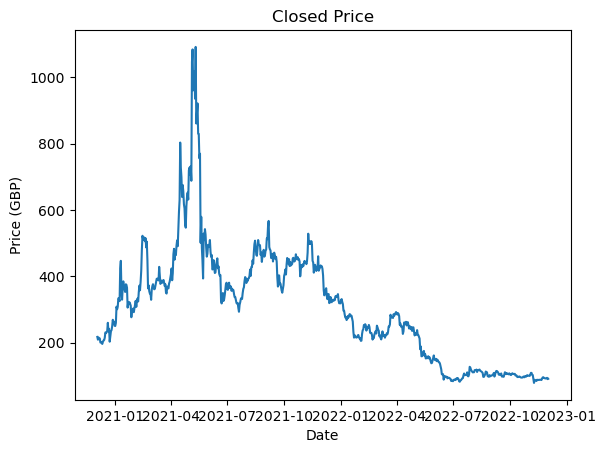

In [20]:
fig = plt.figure()
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Price (GBP)')
plt.title('Closed Price');

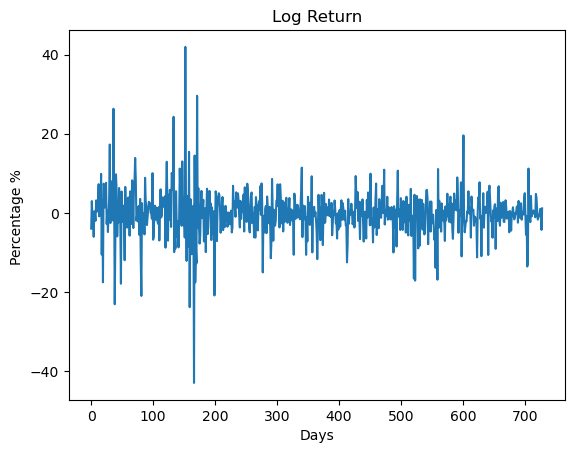

In [21]:
fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

In [22]:
print("Binomial Tree")

Binomial Tree


In [23]:
S0 = data[729]          # spot stock price
K = 90.0                # strike
T = 1/52                # maturity 
r = 0.03                # risk free rate 
sig = sigma = nv        # diffusion coefficient or volatility
N = 104                 # number of periods or number of time steps  
payoff = "put"          # payoff 

In [24]:
dT = float(T) / N                             # Delta t
u = np.exp(sigma * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor 

In [25]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [26]:
S

array([[ 91.04627228,  93.01804662,  95.03252335, ..., 809.79829421,
        827.33596442, 845.2534451 ],
       [  0.        ,  89.11629514,  91.04627228, ..., 775.83035136,
        792.63238334, 809.79829421],
       [  0.        ,   0.        ,  87.2272292 , ..., 743.28723386,
        759.38448483, 775.83035136],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  10.23640548,
         10.45809365,  10.68458289],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         10.0194166 ,  10.23640548],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   9.8070274 ]])

In [27]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

normal    0.494773
dtype: float64

In [28]:
print("Finding the Option Value at each Final Node")

Finding the Option Value at each Final Node


In [29]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 79.31541711],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 79.76359452],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 80.1929726 ]])

In [30]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 7.3465687 ,  6.49000796,  5.69203329, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  8.1854872 ,  7.27154319, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  9.08061089, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 79.76259601,
        79.54140709, 79.31541711],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        79.98008414, 79.76359452],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 80.1929726 ]])

In [31]:
print('European ' + payoff, str( V[0,0]))

European put 7.346568699291708


In [32]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[ 7.34893495,  6.49201993,  5.69373289, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  8.18820044,  7.27386108, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  9.08371132, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 79.76359452,
        79.54190635, 79.31541711],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        79.9805834 , 79.76359452],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 80.1929726 ]])

In [33]:
print('American ' + payoff, str( V[0,0]))

American put 7.348934950066253


In [34]:
print("Black-Scholes Model")

Black-Scholes Model


In [35]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [36]:
euro_option_bs(S0, K, T, r, sig, payoff)[0]

7.335864587428567

In [37]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], K, T, r, sig, payoff)

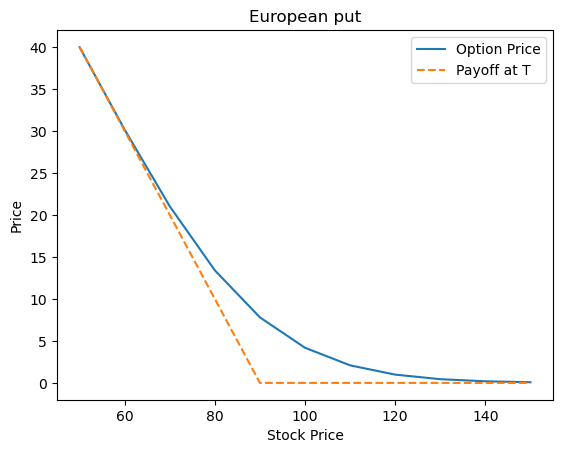

In [38]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(90-S,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European ' + payoff)
plt.legend(['Option Price','Payoff at T'])

In [39]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [40]:
euro_option_bsm(S0, K, T, r, q, sig, payoff)[0]

7.726117218477739

In [41]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(S0, K, T[i], r, q, sig, payoff)

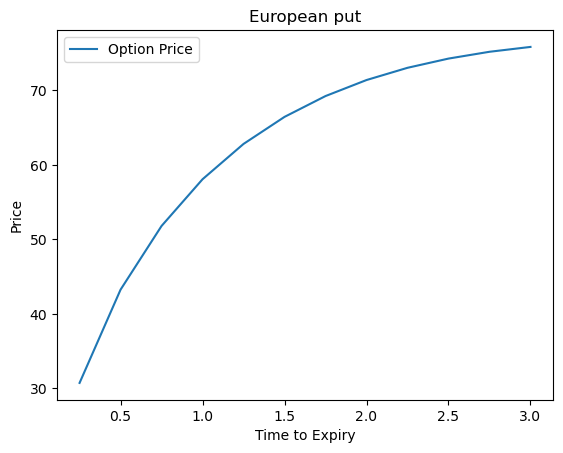

In [42]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European ' + payoff)
plt.legend(['Option Price'])

In [43]:
print("Greeks")

Greeks


In [44]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [45]:
q = 0

In [46]:
euro_option_bsm(S0, K, 1/52, 0.03, 0, sig, 'put')[0]

7.335864587428567

In [47]:
euro_option_bsm(S0, K, 1/52, 0.03, 0, sig, 'call')[0]

8.434044967252959

In [48]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 90.0, 1/52, 0.03, 0, sig, 'call')
    Put [i] = euro_option_bsm(S[i],  90.0, 1/52, 0.03, 0, sig, 'put')

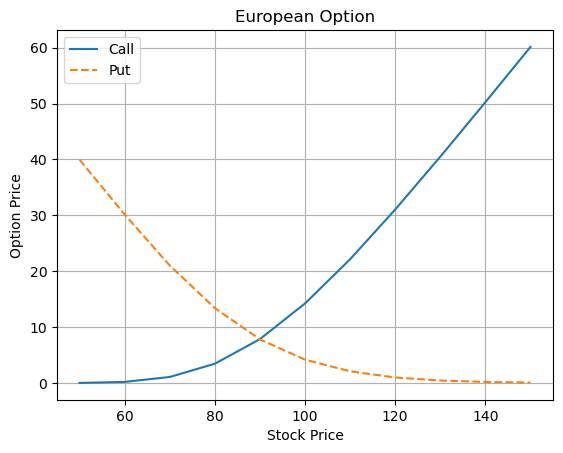

In [49]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

In [50]:
print("Delta")

Delta


In [51]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [52]:
delta(data[729], K, 1/52, 0.03, 0, sig, 'put')[0]

-0.4345553374745206

In [53]:
delta(data[729], K, 1/52, 0.03, 0, sig, 'call')[0]

0.5654446625254794

In [54]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], K, 1/52, 0.03, 0, sig, 'call')
    Delta_Put [i] = delta(S[i], K, 1/52, 0.03, 0, sig, 'put')

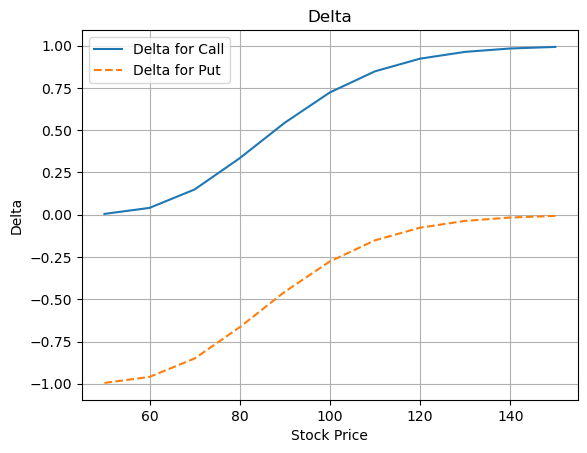

In [55]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

/var/folders/ft/tkk9qm1j34l36ny5s9rwqx_40000gn/T/ipykernel_89611/905541616.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


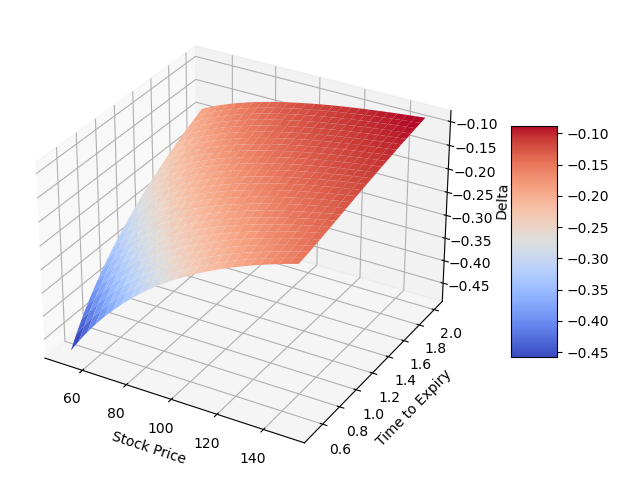

In [56]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], K, T[i], 0.03, 0, sig, 'put')
        
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [57]:
d = delta(S0, K, 1/52, 0.03, 0, sig, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is [0.5654] . If the stock price increase 1 dollar, then the value of the option will increase $ [0.5654] .


In [58]:
print("Gamma")

Gamma


In [59]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [60]:
gamma(data[729], K, 1/52, 0.03, 0, sig, 'call')[0]

0.01978337338862815

In [61]:
gamma(data[729], K, 1/52, 0.03, 0, sig, 'put')[0]

0.01978337338862815

In [62]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],  K, 1/52, 0.03, 0, sig, 'put')

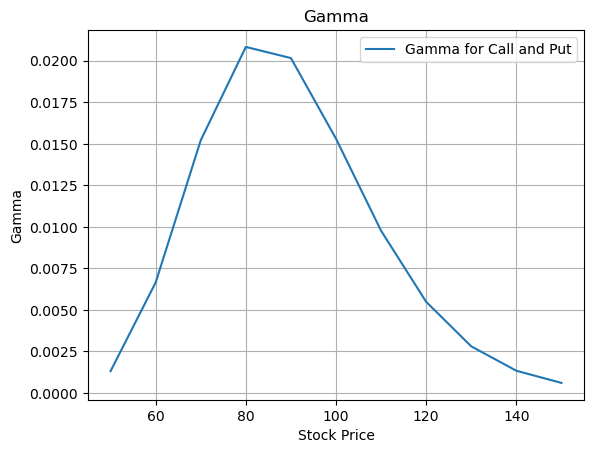

In [63]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

/var/folders/ft/tkk9qm1j34l36ny5s9rwqx_40000gn/T/ipykernel_89611/708718786.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


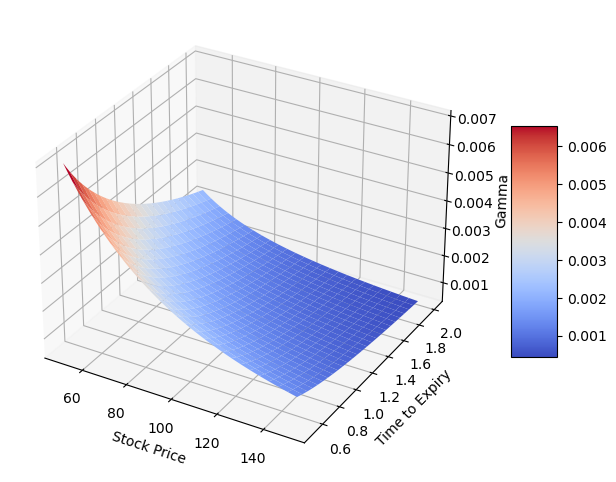

In [64]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], K, T[i], 0.03, 0, sig, 'put')
        
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [65]:
print("Speed")

Speed


In [66]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [67]:
speed(S0, K, 1/52, 0.03, 0, sig, 'call')[0]

-5.2858006538521326e-05

In [68]:
speed(S0, K, 1/52, 0.03, 0, sig, 'put')[0]

-5.2858006538521326e-05

In [69]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], K, 1/52, 0.03, 0, sig, 'call')

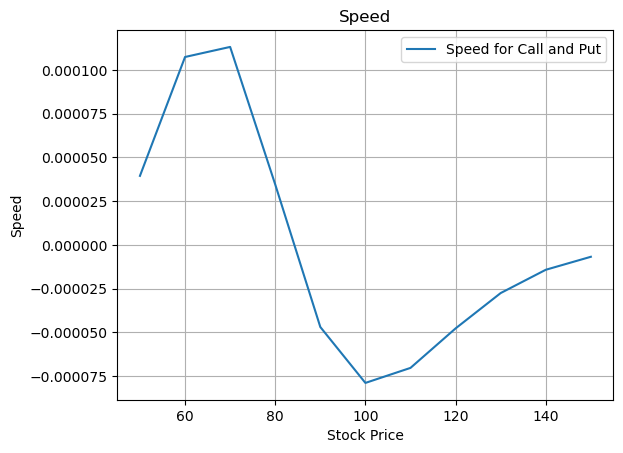

In [70]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

/var/folders/ft/tkk9qm1j34l36ny5s9rwqx_40000gn/T/ipykernel_89611/1471209070.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


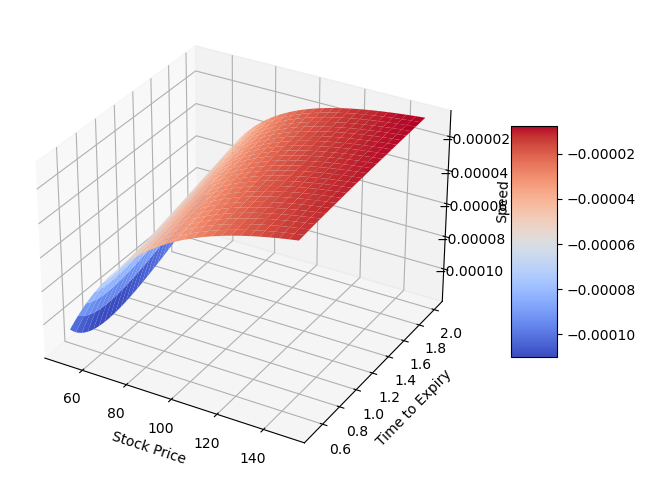

In [71]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], K, T[i], 0.03, 0, sig, 'put')
        
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [72]:
print("Theta")

Theta


In [73]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [74]:
theta(S0, K, 1/52, 0.03, 0, sig, 'call')[0]

204.8548745750045

In [75]:
theta(S0, K, 1/52, 0.03, 0, sig, 'put')[0]

202.15643181806428

In [76]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(S0, K, T[i], r, 0, sig, 'call')
    Theta_Put [i] = theta(S0, K, T[i], r, 0, sig, 'put')

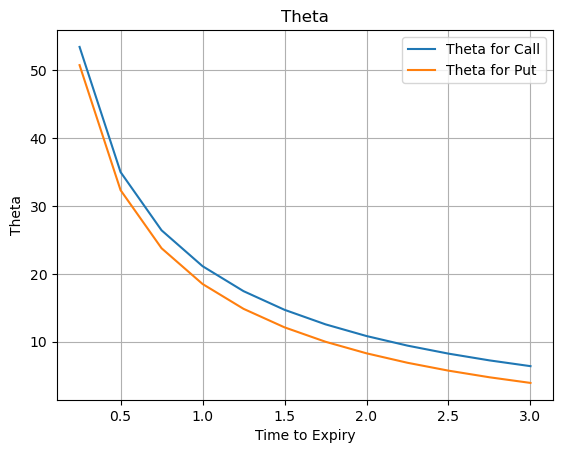

In [77]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

/var/folders/ft/tkk9qm1j34l36ny5s9rwqx_40000gn/T/ipykernel_89611/2644435423.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


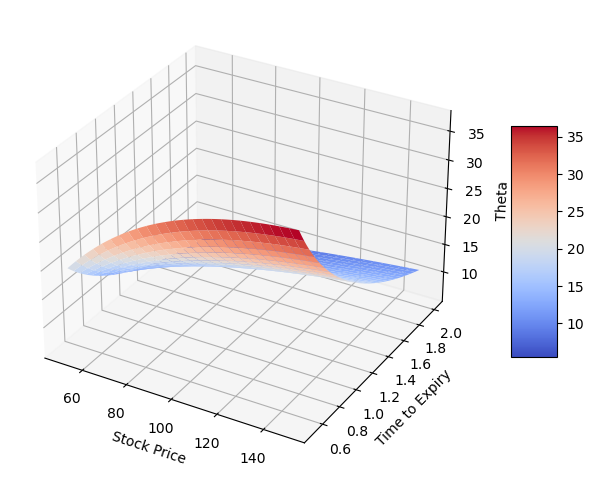

In [78]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], K, T[i], 0.03, 0, sig, 'put')
        
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [79]:
print("Rho")

Rho


In [80]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [81]:
rho(S0, K, 1/52, 0.03, 0, sig, 'call')[0]

0.8278381487517056

In [82]:
rho(S0, K, 1/52, 0.03, 0, sig, 'put')[0]

-0.901932849286903

In [83]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(S0, K, 1/52, r[i], 0, sig, 'call')
    Rho_Put [i] = rho(S0, K, 1/52, r[i], 0, sig, 'put')

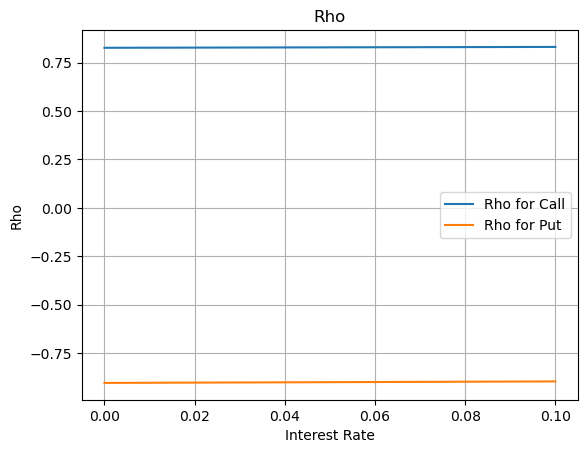

In [84]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

/var/folders/ft/tkk9qm1j34l36ny5s9rwqx_40000gn/T/ipykernel_89611/4260912382.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


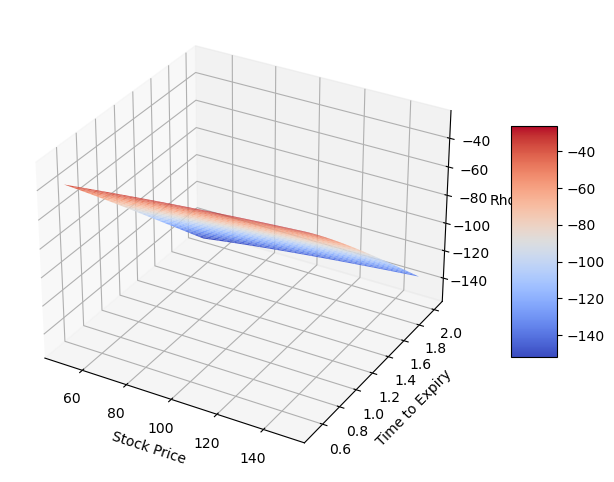

In [85]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], K, T[i], 0.03, 0, sig, 'put')
        
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [86]:
print("Vega")

Vega


In [87]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [88]:
vega(S0, K, 1/52, 0.03, 0, sig, 'call')[0]

4.9690560492192475

In [89]:
vega(S0, K, 1/52, 0.03, 0, sig, 'put')[0]

4.9690560492192475

In [90]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(100, 100, 1, 0.05, 0.03, vol[i], 'call')

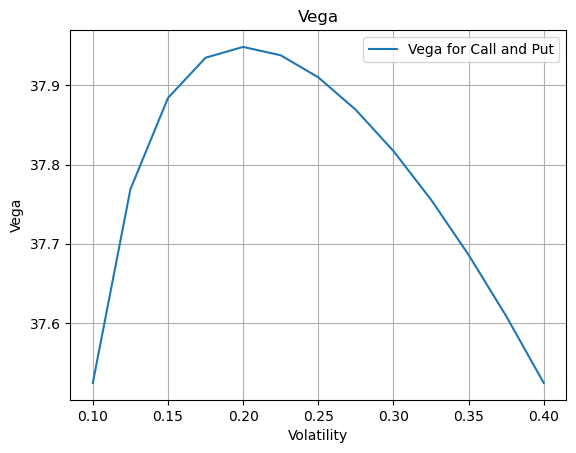

In [91]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

/var/folders/ft/tkk9qm1j34l36ny5s9rwqx_40000gn/T/ipykernel_89611/3685549692.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


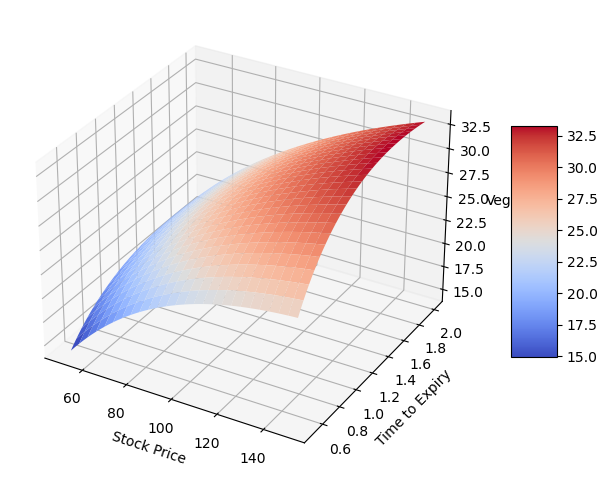

In [92]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], K, T[i], 0.03, 0, sig, 'put')
        
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [93]:
v = vega(S0, K, 1/52, 0.03, 0, sig, 'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is [4.9691] . If the volatility increases 1%, then the value of the option will increase $ [0.049691] .
